In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install transformers

In [3]:
import matplotlib.pyplot as plt
from transformers import pipeline
from pylab import rcParams

In [4]:
rcParams['figure.figsize']=10,5

In [5]:
zero_shot_classifier=pipeline('zero-shot-classification')

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [6]:
prediction=zero_shot_classifier(
sequences='i wanted to say if you are not in my life what we can do',
    candidate_labels=['love','hate','nothing']
)

In [7]:
prediction


{'sequence': 'i wanted to say if you are not in my life what we can do',
 'labels': ['love', 'nothing', 'hate'],
 'scores': [0.7373570799827576, 0.150759756565094, 0.11188313364982605]}

<BarContainer object of 3 artists>

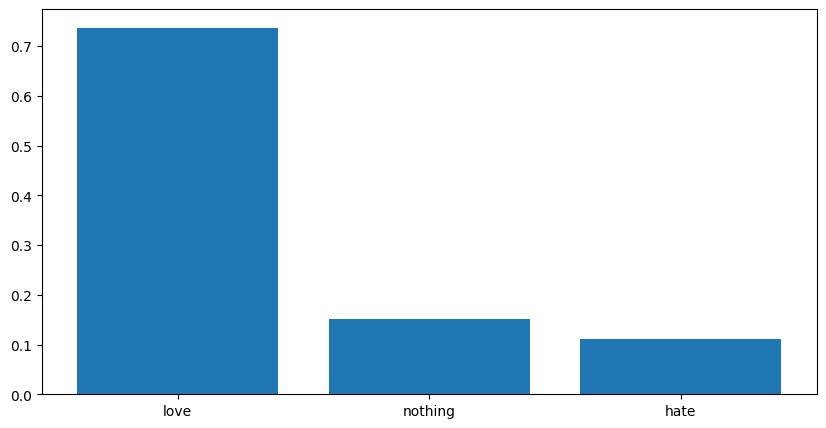

In [22]:
plt.bar(prediction['labels'],prediction['scores'])

Sentence similarity using HuggingFace's sentence transformer

In [9]:
!pip install -q sentence_transformers

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [12]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from pprint import pprint


In [14]:
model= SentenceTransformer('paraphrase-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [15]:
sentences=\
['The cat sat on the windowsill, basking in the warm sunlight',
'The dog rested by the fireplace, enjoying the cozy warmth of the flames',
'The bird perched on the branch, feeling the gentle breeze on its feathers',
'The rabbit lay in the meadow, soaking up the midday sun',
'The squirrel relaxed on the tree limb, watching the peaceful world around it',
]

In [17]:
sentence_embeddings=model.encode(sentences)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
for sentence,embedding in zip(sentences,sentence_embeddings):
    print('sentence:',sentence)
    print('Embedding:',embedding)

sentence: The cat sat on the windowsill, basking in the warm sunlight
Embedding: [ 2.67927349e-01 -4.84016091e-02  3.24013382e-02  7.30297565e-01
 -3.36264700e-01  5.36121354e-02  1.17271796e-01  7.36743212e-04
 -1.60282776e-01  1.62225261e-01 -6.54973626e-01 -1.68169886e-02
  3.42270762e-01  1.90595388e-01 -1.91329837e-01 -1.84413597e-01
 -2.84734480e-02 -1.25019997e-01 -1.04288056e-01  2.00050086e-01
 -1.32823847e-02 -3.16700578e-01 -2.53485471e-01 -3.73566002e-01
  1.15055963e-02 -2.21487671e-01 -2.22718656e-01  1.24691665e-01
 -1.84991598e-01  3.78749222e-01 -3.02690119e-01 -3.25464636e-01
 -1.44456238e-01 -3.94933462e-01  3.34179282e-01 -9.52503644e-03
 -1.94133431e-01  2.88217645e-02 -5.33804968e-02 -4.81524616e-02
 -3.77486646e-01  1.97049379e-02 -2.93295383e-02  1.78088844e-01
  2.51638770e-01 -2.51700819e-01  4.35612082e-01 -2.88754374e-01
  5.45594878e-02  2.53707498e-01 -4.91119295e-01  5.60664952e-01
 -3.05634707e-01 -3.50583792e-01 -4.57847744e-01  7.57644594e-01
  7.92041

In [19]:
len(sentence_embeddings)

5

In [20]:
len(sentence_embeddings[0])

384

<BarContainer object of 384 artists>

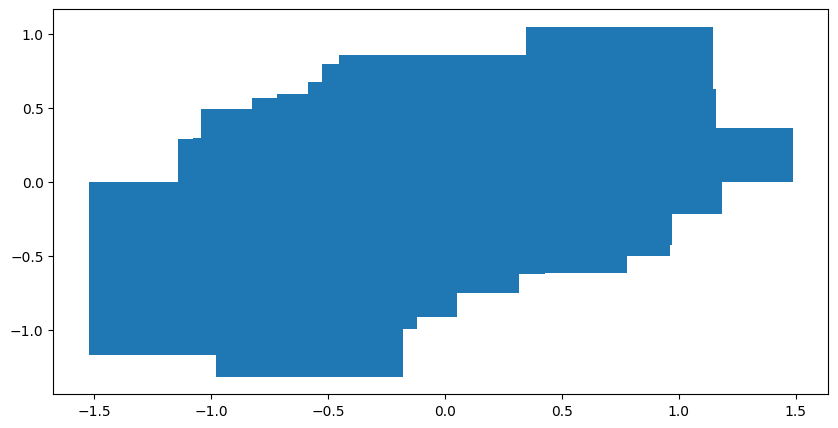

In [24]:
plt.bar(sentence_embeddings[0],sentence_embeddings[2])

In [25]:
pprint('Similarity between {} and {} is {}'.format(sentences[0],
                                                   sentences[1],
                                                   cosine_similarity(sentence_embeddings[0].reshape(1,-1),
                                                    sentence_embeddings[1].reshape(1,-1))[0][0]))

('Similarity between The cat sat on the windowsill, basking in the warm '
 'sunlight and The dog rested by the fireplace, enjoying the cozy warmth of '
 'the flames is 0.3259176015853882')
